#BUSINESS UNDERSTANDING

## Define the research Question

Can a model be built that predictes the occurence of a liver disease in a patient given laboratory data?

## Merits of Success

## The context

## Appropriateness of the dataset

#DATA AQUISITION AND ETL

In this section the data shall be acquired loaded and by looking (scanning) through prepared for analysis and modelling.

## Import libraries

In [55]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Models and related methods
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Reading dataset

In [56]:
#We load the dataset into the notebook

data = pd.read_csv('/home/trees/Indian Liver Patient Dataset (ILPD).csv', header=None)

In [57]:
#Naming of the columns in the dataset

data.columns = ['age','gender','TB', 'DB' , 'AAP' , 'sgpt' , 'sgot' , 'TP' , 'ALB' , 'AG' , 'selector']

## Checking dataset

Information about the dataset are looked at in this section

In [58]:
data.columns

Index(['age', 'gender', 'TB', 'DB', 'AAP', 'sgpt', 'sgot', 'TP', 'ALB', 'AG',
       'selector'],
      dtype='object')

In [59]:
data.head()

,age,gender,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [60]:
data.tail()

,age,gender,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [61]:
data.shape

(583, 11)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age         583 non-null int64
gender      583 non-null object
TB          583 non-null float64
DB          583 non-null float64
AAP         583 non-null int64
sgpt        583 non-null int64
sgot        583 non-null int64
TP          583 non-null float64
ALB         583 non-null float64
AG          579 non-null float64
selector    583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [63]:
data.dtypes

age           int64
gender       object
TB          float64
DB          float64
AAP           int64
sgpt          int64
sgot          int64
TP          float64
ALB         float64
AG          float64
selector      int64
dtype: object

In [64]:
data.describe()

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


##Data understanding

In [65]:
#A table is made that summarises what the data collected has and the extremes of 
#the data that is available.

desc = pd.DataFrame(data.dtypes, columns= ['Types'])
desc['Max'] = ''
desc['Min'] = ''
desc['Unique'] = ''
for e , row in desc.iterrows():
  if row['Types'] != 'object':
    desc.loc[e , 'Max'] = data[e].max()
    desc.loc[e , 'Min'] = data[e].min()
    desc.loc[e , 'Unique'] = len(data[e].unique())

In [66]:
desc

,Types,Max,Min,Unique
age,int64,90,4,72
gender,object,,,
TB,float64,75,0.4,113
DB,float64,19.7,0.1,80
AAP,int64,2110,63,263
sgpt,int64,2000,10,152
sgot,int64,4929,10,177
TP,float64,9.6,2.7,58
ALB,float64,5.5,0.9,40
AG,float64,2.8,0.3,70


# Data Preparation

## Duplicates

In [67]:
data.duplicated().sum()

13

In [68]:
data.drop_duplicates(inplace = True)

In [69]:
data.duplicated().sum()

0

## Missing data

In [70]:
data.isnull().sum()

age         0
gender      0
TB          0
DB          0
AAP         0
sgpt        0
sgot        0
TP          0
ALB         0
AG          4
selector    0
dtype: int64

In [71]:
data = data.dropna()

In [72]:
data.isnull().sum()

age         0
gender      0
TB          0
DB          0
AAP         0
sgpt        0
sgot        0
TP          0
ALB         0
AG          0
selector    0
dtype: int64

In [73]:
data.shape

(566, 11)

##Outliers and histograms

Extreme data (maximum and minimums) and their frequency is sought after in this section. Furthermore; a relative concept of the normal is sought after here.

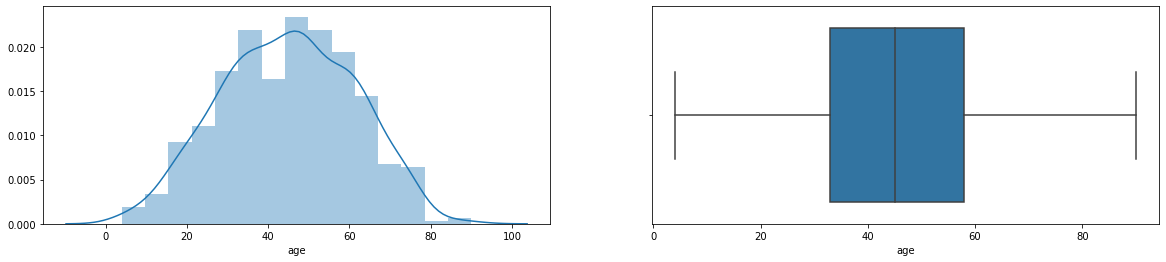

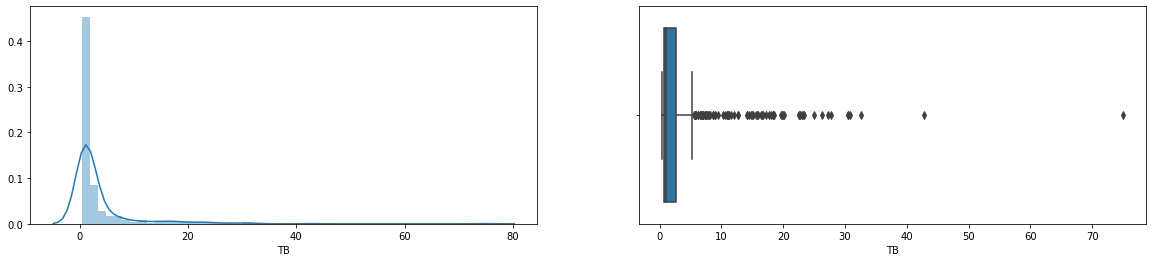

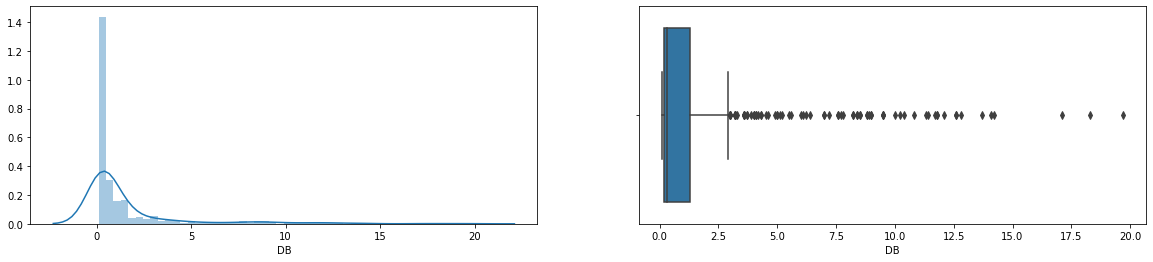

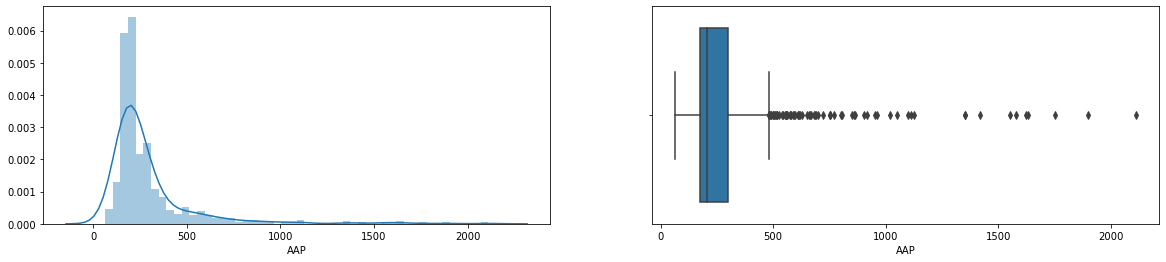

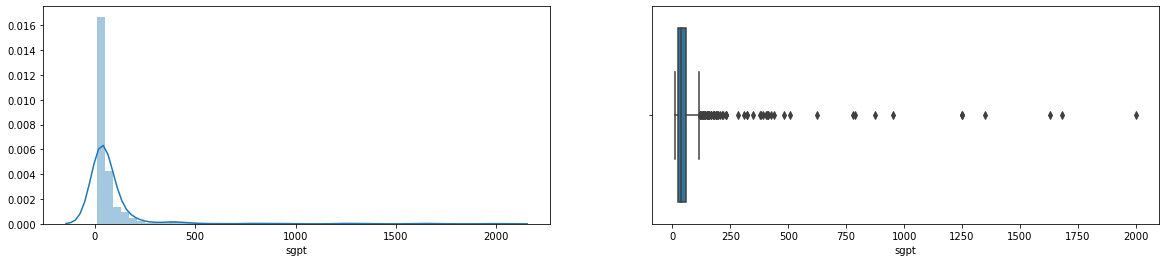

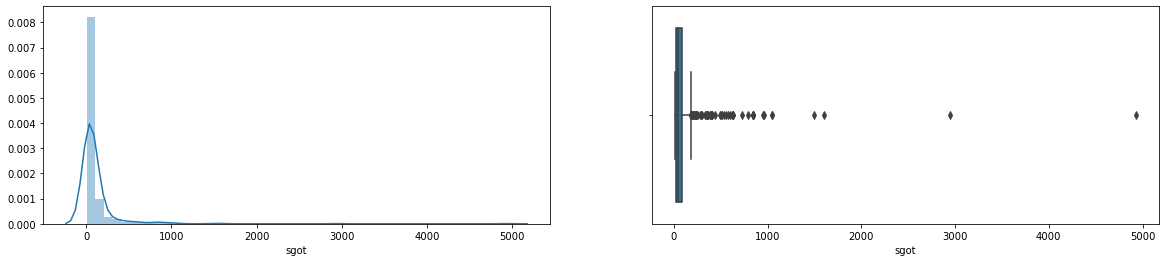

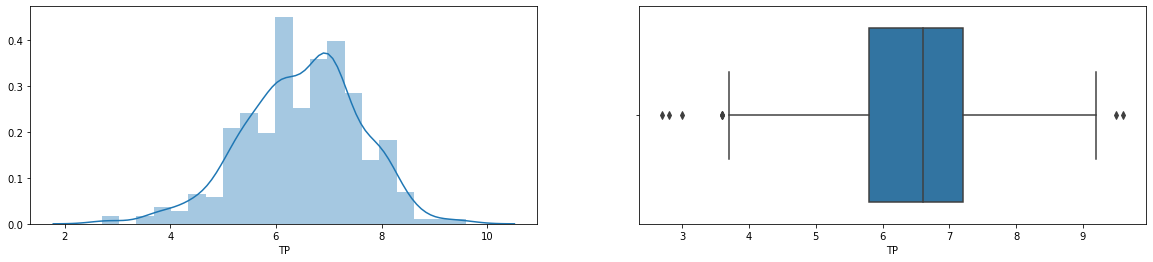

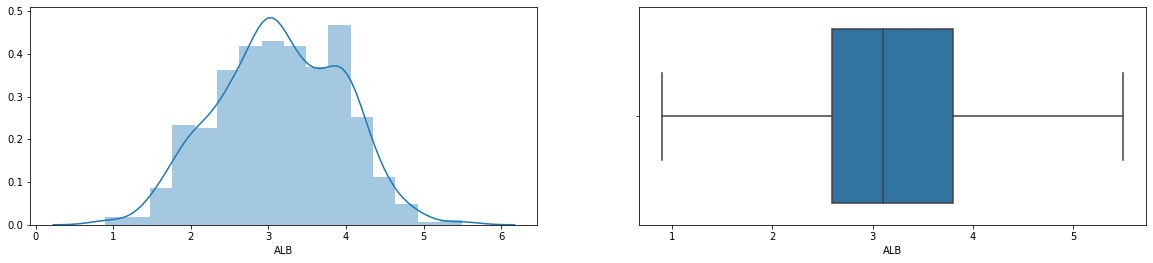

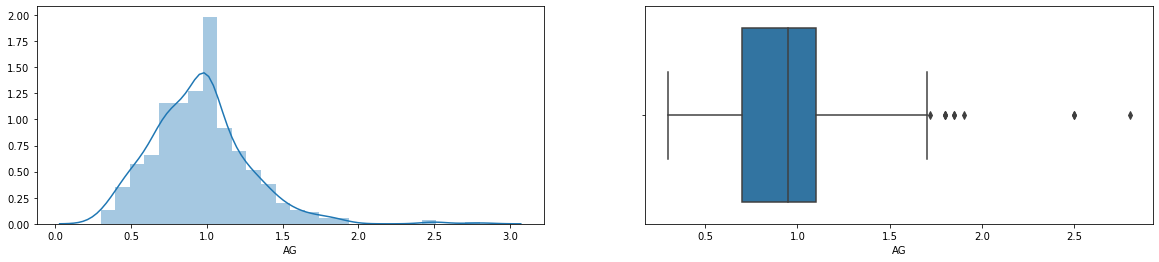

In [74]:
numeric = data.drop(['selector', 'gender'], axis=1)
columns = list(numeric.columns)
for column in columns:
  plo = plt.figure(figsize=(20,4))
  plo.add_subplot(1,2,1)
  sns.distplot(data[column])
  plo.add_subplot(1,2,2)
  sns.boxplot(data[column])

Looking at the data from the graphs we can see both the distripution and what we would term as outliers in the sense. Considering that this is based on medical data; the outliers in themselves are pressumed to be the causes of said diseases thus they are not dropped from the dataset.

##Changing the gender column to a numeriacally representable value

We need our data to be as numerical as possible; the column gender described above is thus changed to wheteher or not the sample is Female with 1 demarcating yes the sample is a female and 0 representing male. Afterwards, the relicated data is dropped.

In [75]:
dum = pd.get_dummies(data['gender'])

In [76]:
sure = pd.merge(data , dum , left_index=True , right_index=True)

In [77]:
sure = sure.drop(['gender','Male'], axis=1)

In [78]:
sure.head()

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector,Female
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0


#EXPLORATORY DATA ANALYSIS

In [79]:
toeda = sure.copy()

## Univariate Analysis

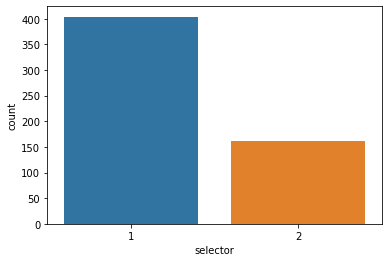

In [80]:
#selector is an encoded column that has 1 for the liver disease sample patients and
# 2 for the non liver disease patients

sns.countplot(toeda['selector'])

In [81]:
toeda['selector'].value_counts()

1    404
2    162
Name: selector, dtype: int64

##Distribution vs optimum

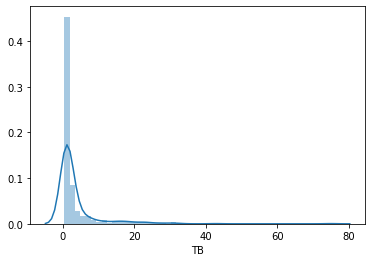

In [82]:
sns.distplot(toeda['TB'])

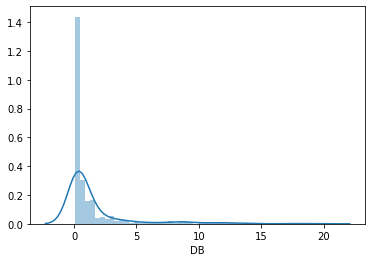

In [83]:
sns.distplot(toeda['DB'])

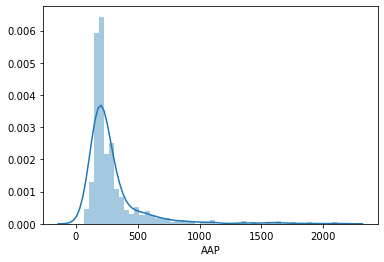

In [84]:
sns.distplot(toeda['AAP'])

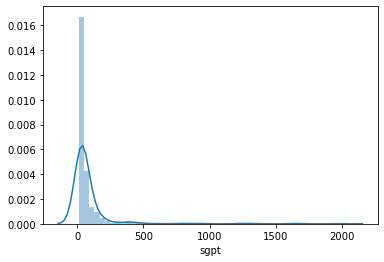

In [85]:
sns.distplot(toeda['sgpt'])

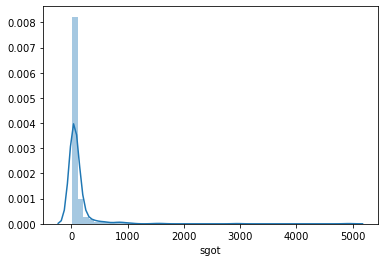

In [86]:
sns.distplot(toeda['sgot'])

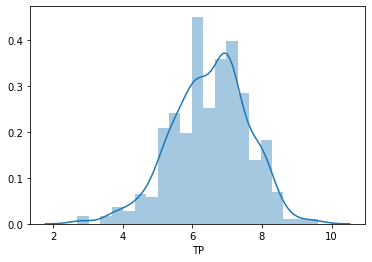

In [87]:
sns.distplot(toeda['TP'])

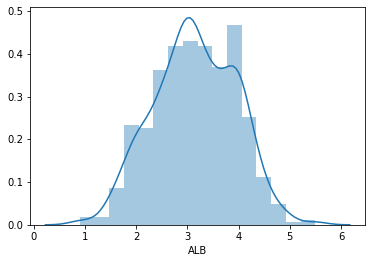

In [88]:
sns.distplot(toeda['ALB'])

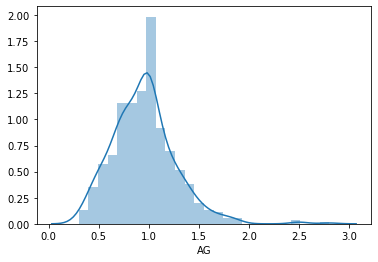

In [89]:
sns.distplot(toeda['AG'])

## Bivariate Analysis

### Correlation

<function matplotlib.pyplot.show(*args, **kw)>

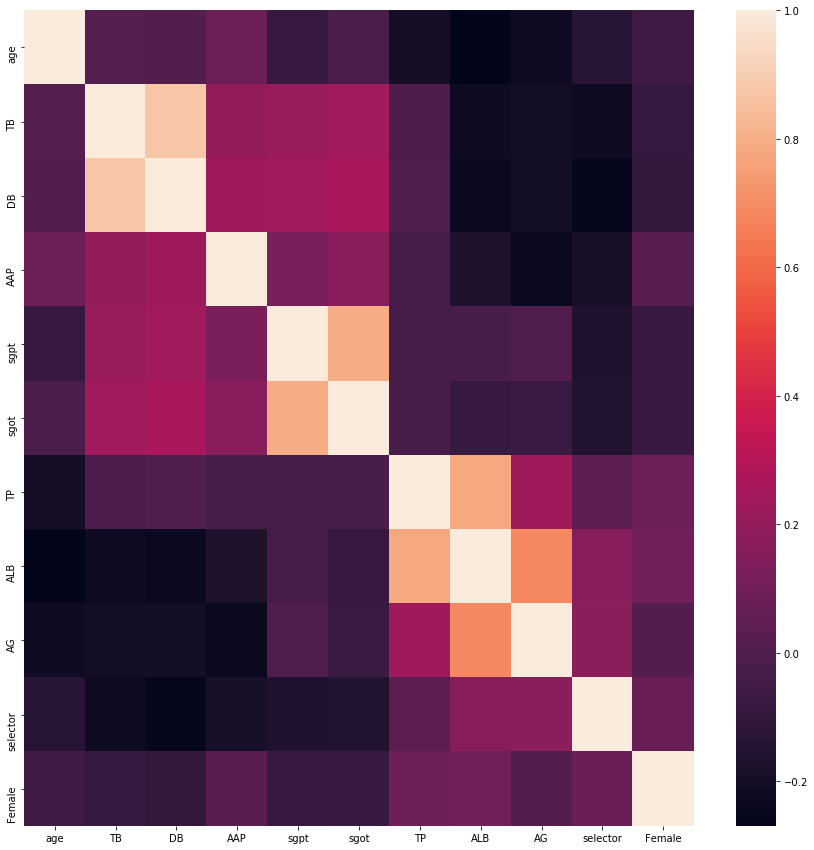

In [90]:
#A heatmap is created to show the correlation between different attributes of the
#data that has been collected
plt.figure(figsize=(15,15))
sns.heatmap(toeda.corr())
plt.show

In [91]:
#A correlation table is made to suppliment the information above

toeda.corr()

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector,Female
age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.133821,-0.057542
TB,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.224467,-0.089068
DB,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.250926,-0.100448
AAP,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,-0.186057,0.024879
sgpt,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.161617,-0.083336
sgot,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.151009,-0.080593
TP,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.036443,0.092049
ALB,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.165273,0.093208
AG,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.171402,0.005611
selector,-0.133821,-0.224467,-0.250926,-0.186057,-0.161617,-0.151009,0.036443,0.165273,0.171402,1.000000,0.077396


##Multicollinearity

The variable inflation factor is sought within the data to further look into.

In [92]:
independent_only = toeda.drop(columns=['selector'])

correlations = independent_only.corr()

correlations

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,Female
age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.057542
TB,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.089068
DB,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.100448
AAP,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,0.024879
sgpt,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.083336
sgot,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.080593
TP,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.092049
ALB,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.093208
AG,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.005611
Female,-0.057542,-0.089068,-0.100448,0.024879,-0.083336,-0.080593,0.092049,0.093208,0.005611,1.000000


In [93]:
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

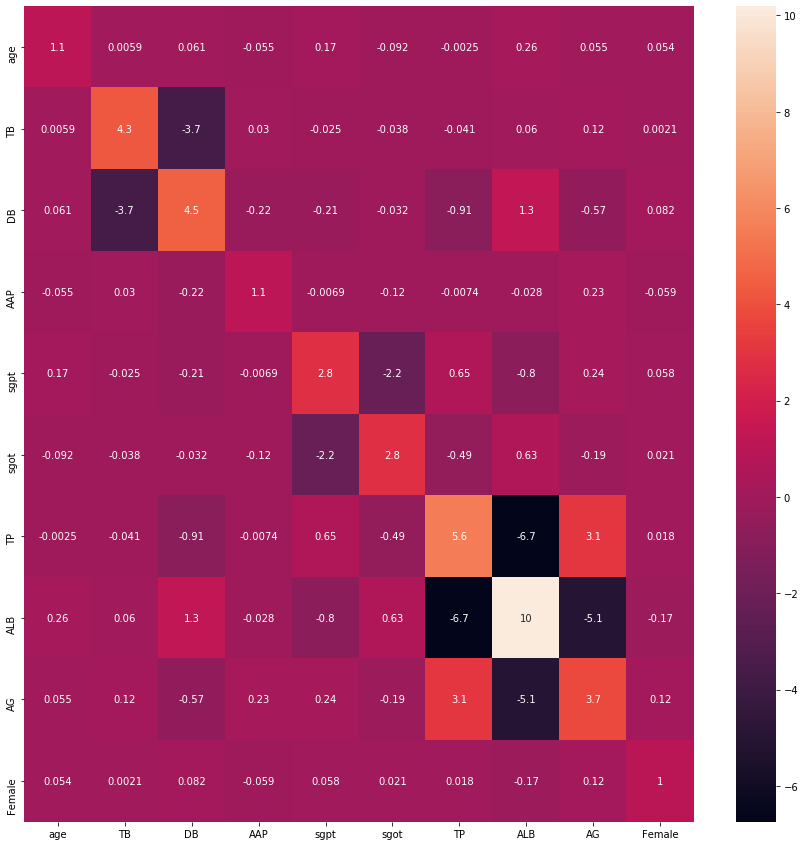

In [94]:
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

The row with the highest VIF is dropped and the VIF is sought for again.

In [95]:
independent_only = independent_only.drop(columns=['ALB'])

correlations = independent_only.corr()
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

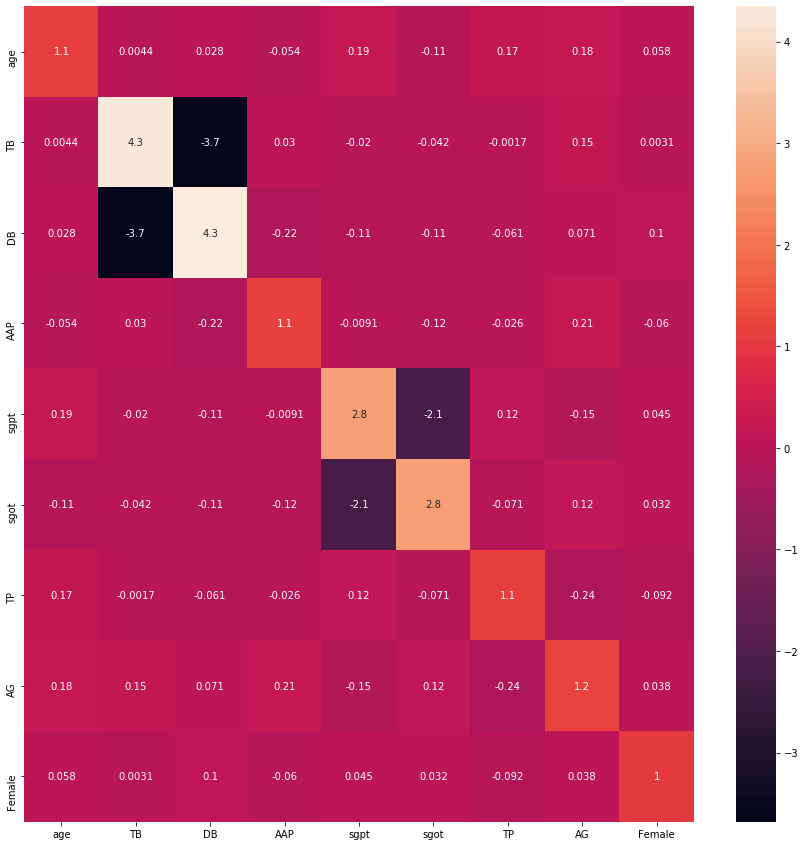

In [96]:
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

### NB
 - Drop ALB

In [ ]:
test_features = independent_only.columns.to_list()

In [ ]:
X = independent_only
y = toeda['selector']

In [157]:
a = independent_only.columns

In [159]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X, y = nm.fit_sample(X, y)

In [160]:
np.unique(y, return_counts=True)

(array([1, 2]), array([162, 162]))

#MODEL TRAINING

In [161]:
X = toeda.drop(['selector', 'ALB'], axis=1)
y = toeda['selector']

## Random forest

### Part 1

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier() 

model = forest.fit(x_train, y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 2 2 2 2 1 2 1 2 1 1 1 2 2 2 1 1 2 1 2 2 1 1 1 2 2 2 2 2 2 2 1 2 2 1 2
 1 2 1 2 2 2 2 1 2 1 2 2 2 1 1 1 1 1 2 2 1 1 1 1 2 2 1 2]

Accuracy score: 
 0.5538461538461539

The confusion matrix:
[[19 19]
 [10 17]]

The classification report:
              precision    recall  f1-score   support

           1       0.66      0.50      0.57        38
           2       0.47      0.63      0.54        27

    accuracy                           0.55        65
   macro avg       0.56      0.56      0.55        65
weighted avg       0.58      0.55      0.56        65



#### Feature importance

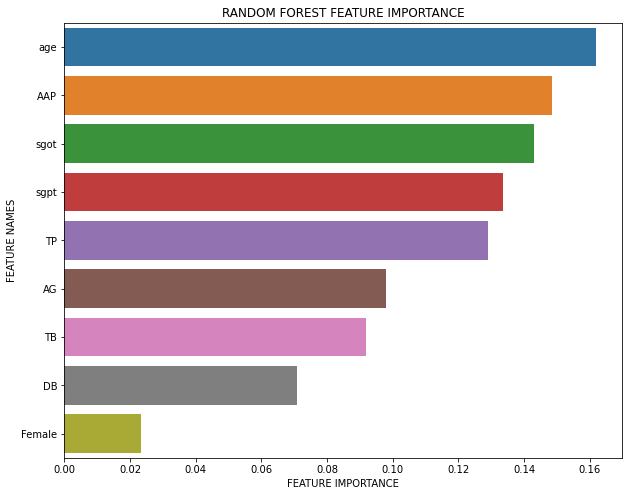

In [47]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'RANDOM FOREST ')

### Part 2

In [163]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 5, 
                           n_jobs = 4, 
                           verbose = 2)

In [164]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   14.8s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   34.8s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 1440 out of 1440 | elapsed:  2.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [165]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [170]:
par = grid_search.best_params_

max_depth = par['max_depth']
max_features = par['max_features']
min_samples_leaf = par['min_samples_leaf']
min_samples_split = par['min_samples_split']
n_estimators = par['n_estimators']

In [171]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = n_estimators, 
                               random_state = 42, 
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf,
                               max_features=max_features,
                               max_depth=max_depth)  

model = forest.fit(x_train, y_train)
model

RandomForestClassifier(max_depth=90, min_samples_leaf=5, min_samples_split=12,
                       random_state=42)

In [172]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1
 1 2 1 2 2 2 2 1 2 1 1 2 1 2 1 2 2 1 1 1 2 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 2
 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

Accuracy score: 
 0.7192982456140351

The confusion matrix:
[[66 15]
 [17 16]]

The classification report:
              precision    recall  f1-score   support

           1       0.80      0.81      0.80        81
           2       0.52      0.48      0.50        33

    accuracy                           0.72       114
   macro avg       0.66      0.65      0.65       114
weighted avg       0.71      0.72      0.72       114



#### Feature importance

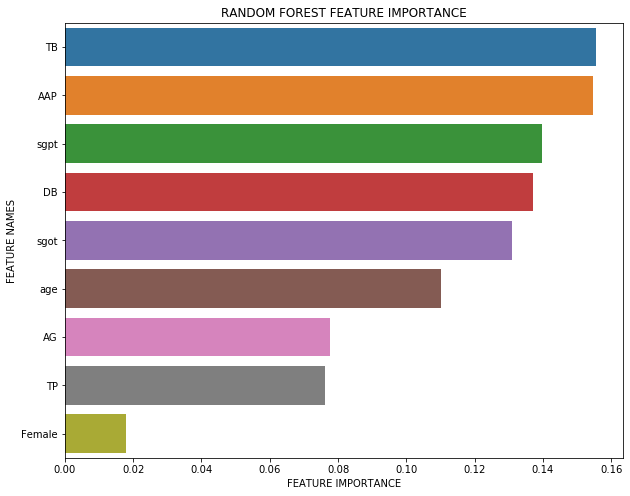

In [173]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'RANDOM FOREST ')

## Ada Boost

### Part 1

In [174]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)) 

model = ada_boost.fit(x_train, y_train)
model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [175]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[2 1 1 2 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2
 1 1 1 1 1 1 1 2 2 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2
 1 2 1]

Accuracy score: 
 0.5877192982456141

The confusion matrix:
[[57 15]
 [32 10]]

The classification report:
              precision    recall  f1-score   support

           1       0.64      0.79      0.71        72
           2       0.40      0.24      0.30        42

    accuracy                           0.59       114
   macro avg       0.52      0.51      0.50       114
weighted avg       0.55      0.59      0.56       114



#### Feature importance

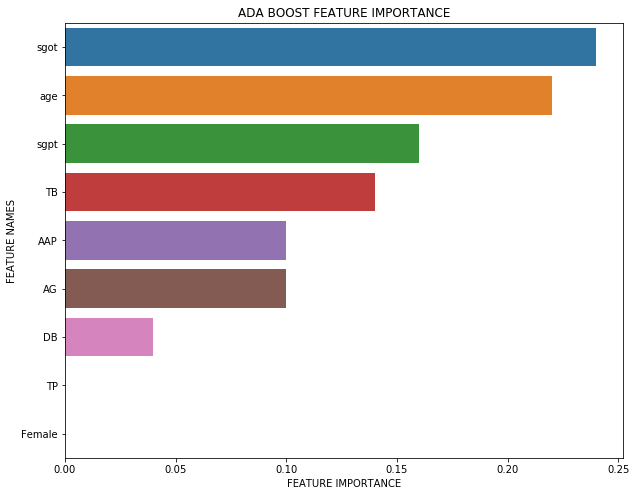

In [176]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'ADA BOOST ')

### Part 2

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#Creating a grid of hyperparameters
param_dist = {
 'n_estimators': [50, 100,200,300],
 'learning_rate': [0.01,0.05,0.1,0.3,1],
 'algorithm':['SAMME','SAMME.R']
 }

ada=AdaBoostClassifier()

grid_search = GridSearchCV(estimator=ada, 
                           param_grid=param_dist, 
                           cv = 5,
                           verbose=2,
                           n_jobs=4)

In [179]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    8.0s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=4,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=2)

In [180]:
grid_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 50}

In [181]:
par = grid_search.best_params_

learning_rate = par['learning_rate']
algorithm = par['algorithm']
n_estimators = par['n_estimators']

In [182]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                              algorithm=algorithm,
                              n_estimators=n_estimators,
                              learning_rate=learning_rate, 
                              random_state=42) 

model = ada_boost.fit(x_train, y_train)
model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, random_state=42)

In [183]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1]

Accuracy score: 
 0.6140350877192983

The confusion matrix:
[[69  3]
 [41  1]]

The classification report:
              precision    recall  f1-score   support

           1       0.63      0.96      0.76        72
           2       0.25      0.02      0.04        42

    accuracy                           0.61       114
   macro avg       0.44      0.49      0.40       114
weighted avg       0.49      0.61      0.49       114



#### Feature importance

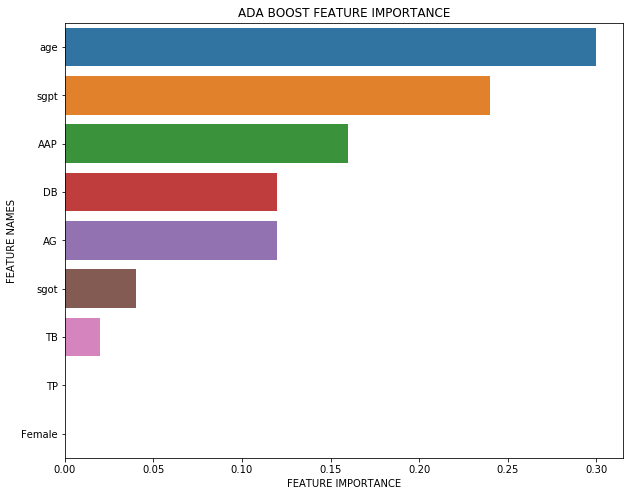

In [184]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'ADA BOOST ')

## Gradient Boost

### Part 1

In [185]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

model = clf.fit(x_train, y_train)
model

GradientBoostingClassifier()

In [186]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1
 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1]

Accuracy score: 
 0.6941176470588235

The confusion matrix:
[[104  21]
 [ 31  14]]

The classification report:
              precision    recall  f1-score   support

           1       0.77      0.83      0.80       125
           2       0.40      0.31      0.35        45

    accuracy                           0.69       170
   macro avg       0.59      0.57      0.57       170
weighted avg       0.67      0.69      0.68       170



#### Feature importance

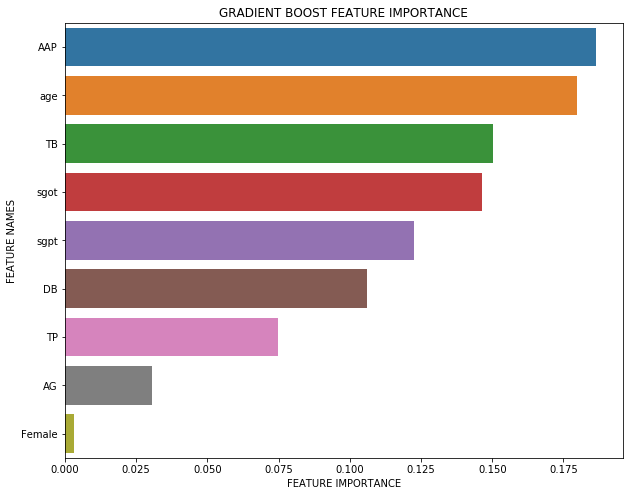

In [187]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'GRADIENT BOOST ')

### Part 2

In [202]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.ensemble import GradientBoostingClassifier

#Creating a grid of hyperparameters
param_dist = {
 'n_estimators': [1, 2 , 100, 200],
 'learning_rate': [1, 0.01],
 'max_depth': np.linspace(1, 10, 5, endpoint=True),
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
 'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
 'max_features': ['auto', 'sqrt']
 
 }

gf=GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gf, 
                           param_grid=param_dist, 
                           cv = 5,
                           n_jobs=4,
                           verbose=2)

grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 1012 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done 2636 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 4900 tasks      | elapsed:   29.7s
[Parallel(n_jobs=4)]: Done 7820 tasks      | elapsed:   47.1s
[Parallel(n_jobs=4)]: Done 11380 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 15596 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 20000 out of 20000 | elapsed:  2.0min finished


{'learning_rate': 0.01,
 'max_depth': 3.25,
 'max_features': 'auto',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.7000000000000001,
 'n_estimators': 200}

In [206]:
par = grid_search.best_params_

n_estimators = par['n_estimators']
learning_rate = par['learning_rate']
max_depth = par['max_depth']
min_samples_split = par['min_samples_split']
min_samples_leaf = par['min_samples_leaf']
max_features = par['max_features']


In [211]:
clf = GradientBoostingClassifier(learning_rate=learning_rate, 
                                 n_estimators=n_estimators,
                                 min_samples_split=min_samples_split, 
                                 min_samples_leaf=min_samples_leaf, 
                                 max_depth=max_depth,   
                                 max_features=max_features)

model = clf.fit(x_train, y_train)
model

GradientBoostingClassifier(learning_rate=0.01, max_depth=3.25,
                           max_features='auto', min_samples_leaf=0.1,
                           min_samples_split=0.7000000000000001,
                           n_estimators=200)

In [212]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Accuracy score: 
 0.7470588235294118

The confusion matrix:
[[123   2]
 [ 41   4]]

The classification report:
              precision    recall  f1-score   support

           1       0.75      0.98      0.85       125
           2       0.67      0.09      0.16        45

    accuracy                           0.75       170
   macro avg       0.71      0.54      0.50       170
weighted avg       0.73      0.75      0.67       170



#### Feature importance

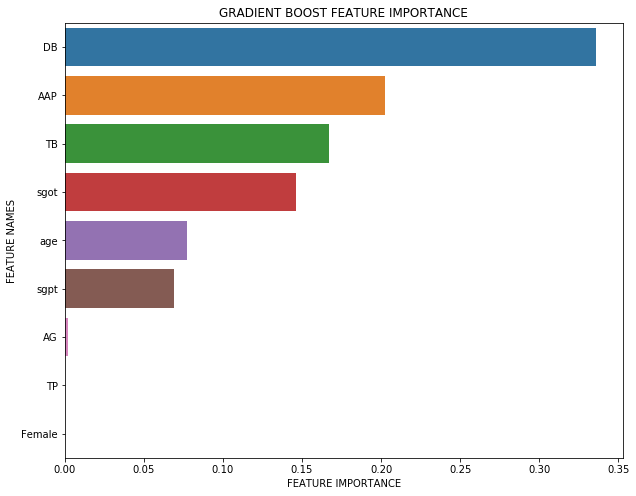

In [213]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'GRADIENT BOOST ')

## SVM(Polymomial function)

### Part 1

In [196]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.svm import SVC

# Building the model 
polyclassifier = SVC(kernel='poly')

# Training the model using the training set
model = polyclassifier.fit(x_train, y_train)
model

SVC(kernel='poly')

In [197]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Accuracy score: 
 0.7352941176470589

The confusion matrix:
[[125   0]
 [ 45   0]]

The classification report:
              precision    recall  f1-score   support

           1       0.74      1.00      0.85       125
           2       0.00      0.00      0.00        45

    accuracy                           0.74       170
   macro avg       0.37      0.50      0.42       170
weighted avg       0.54      0.74      0.62       170



### Part 2

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1,1], 
              'gamma': ['scale', 'auto'],
              'kernel': ['poly'],
            #   'degree': [1],
              'degree': [1,2,3,4,5,6,7,8,9,10],
              'decision_function_shape':['ovo','ovr']}

grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           refit = True,
                           verbose = 3,
                           n_jobs=6,
                           cv=5)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 250 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 389 out of 400 | elapsed:  4.8min remaining:    8.1s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:  5.3min finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=6,
             param_grid={'C': [0.1, 1],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto'], 'kernel': ['poly']},
             verbose=3)

In [199]:
par = grid_search.best_params_

c = par['C']
decision_function_shape = par['decision_function_shape']
degree = par['degree']
gamma = par['gamma']
kernel = par['kernel']

In [200]:
# Building the model 
polyclassifier = SVC(C=c,
                     kernel=kernel, 
                     degree=degree, 
                     gamma=gamma,  
                     decision_function_shape=decision_function_shape)

# Training the model using the training set
model = polyclassifier.fit(x_train, y_train)
model

SVC(C=0.1, decision_function_shape='ovo', kernel='poly')

In [201]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]

Accuracy score: 
 0.7294117647058823

The confusion matrix:
[[123   2]
 [ 44   1]]

The classification report:
              precision    recall  f1-score   support

           1       0.74      0.98      0.84       125
           2       0.33      0.02      0.04        45

    accuracy                           0.73       170
   macro avg       0.53      0.50      0.44       170
weighted avg       0.63      0.73      0.63       170



## SVM( Radial basis function (rbf))

### Part 1

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
model = rbfclassifier.fit(x_train, y_train)
model

SVC()

In [148]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

Accuracy score: 
 0.631578947368421

The confusion matrix:
[[72  0]
 [42  0]]

The classification report:
              precision    recall  f1-score   support

           1       0.63      1.00      0.77        72
           2       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



### Part 2

In [143]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1,1, 10, 100], 
              'gamma': ['scale', 'auto'],
              'kernel': ['rbf'],
              'decision_function_shape':['ovo','ovr']}

grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           refit = True,
                           verbose = 3)

grid_search.fit(x_train, y_train)            

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf, score=0.736, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf, score=0.736, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf, score=0.733, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf, score=0.733, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf, score=0.733, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=auto, kernel=rbf ......
[CV]  C=0.1, decision_function_shape=ovo, g

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
             verbose=3)

In [144]:
par = grid_search.best_params_

c = par['C']
decision_function_shape = par['decision_function_shape']
gamma = par['gamma']
kernel = par['kernel']

In [145]:
# Building the model 
rbfclassifier = SVC(C=c,
                    kernel=kernel,  
                    gamma=gamma,  
                    decision_function_shape=decision_function_shape)
# Training the model using the training set
model = rbfclassifier.fit(x_train, y_train)
model

SVC(C=0.1, decision_function_shape='ovo')

In [146]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

Accuracy score: 
 0.631578947368421

The confusion matrix:
[[72  0]
 [42  0]]

The classification report:
              precision    recall  f1-score   support

           1       0.63      1.00      0.77        72
           2       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



## SVM(Sigmoid function)

### Part 1

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
model = sigclassifier.fit(x_train, y_train)
model

SVC(kernel='sigmoid')

In [128]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 2
 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 1 1 1 1 1 2 1 1 2
 2 2 2]

Accuracy score: 
 0.5614035087719298

The confusion matrix:
[[54 18]
 [32 10]]

The classification report:
              precision    recall  f1-score   support

           1       0.63      0.75      0.68        72
           2       0.36      0.24      0.29        42

    accuracy                           0.56       114
   macro avg       0.49      0.49      0.48       114
weighted avg       0.53      0.56      0.54       114



### Part 2

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1,1, 10, 100], 
              'gamma': ['scale', 'auto'],
              'kernel': ['sigmoid'],
              'decision_function_shape':['ovo','ovr']}

grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           refit = True,
                           verbose = 3,
                           cv=10)

grid_search.fit(x_train, y_train)              

C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.667, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ...
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ...
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.756, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ...
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.689, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ...
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.756, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ...
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.689, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ...
[CV]

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'], 'kernel': ['sigmoid']},
             verbose=3)

In [132]:
par = grid_search.best_params_

c = par['C']
decision_function_shape = par['decision_function_shape']
gamma = par['gamma']
kernel = par['kernel']

In [133]:
# Building the model 
sigclassifier = SVC(C=c,
                    kernel=kernel,  
                    gamma=gamma,  
                    decision_function_shape=decision_function_shape)
# Training the model using the training set
model = sigclassifier.fit(x_train, y_train)
model

SVC(C=0.1, decision_function_shape='ovo', gamma='auto', kernel='sigmoid')

In [134]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

Accuracy score: 
 0.6140350877192983

The confusion matrix:
[[70  2]
 [42  0]]

The classification report:
              precision    recall  f1-score   support

           1       0.62      0.97      0.76        72
           2       0.00      0.00      0.00        42

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.48       114



## KNN

### Part 1

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

model = classifier.fit(x_train, y_train)
model

KNeighborsClassifier()

In [136]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 2 2 1 2 2 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 2 1 1
 1 1 1 2 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1]

Accuracy score: 
 0.6294117647058823

The confusion matrix:
[[96 18]
 [45 11]]

The classification report:
              precision    recall  f1-score   support

           1       0.68      0.84      0.75       114
           2       0.38      0.20      0.26        56

    accuracy                           0.63       170
   macro avg       0.53      0.52      0.51       170
weighted avg       0.58      0.63      0.59       170



### Part 2

In [218]:
from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
X = normalizer.transform(X)

In [220]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

parameters = {'n_neighbors': list(range(1,30)),
              'leaf_size': list(range(1,50)),
              'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean','mahalanobis']
              }

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, 
                           param_grid=parameters,
                           n_jobs=4) 

print(grid_search.fit(x_train, y_train))
print('')
print('')
print('The parameters:')
print(grid_search.best_params_)             

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})


The parameters:
{'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 6}


In [221]:
par = grid_search.best_params_

leaf_size = par['leaf_size']
n_neighbors = par['n_neighbors']
metric = par['metric']

In [222]:
classifier = KNeighborsClassifier(n_neighbors=n_neighbors, leaf_size=leaf_size, metric=metric)

model = classifier.fit(x_train, y_train)
model

KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=6)

In [223]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2
 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 2
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1]

Accuracy score: 
 0.6470588235294118

The confusion matrix:
[[99 15]
 [45 11]]

The classification report:
              precision    recall  f1-score   support

           1       0.69      0.87      0.77       114
           2       0.42      0.20      0.27        56

    accuracy                           0.65       170
   macro avg       0.56      0.53      0.52       170
weighted avg       0.60      0.65      0.60       170



## Naive Bayes( Multinomial)

### Part 1

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB

Multinomial = MultinomialNB() 

model = Multinomial.fit(x_train, y_train)
model

MultinomialNB()

In [125]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 1 2 2
 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1
 2 2 1 2 1 2 1 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2
 2 2 2]

Accuracy score: 
 0.4824561403508772

The confusion matrix:
[[20 52]
 [ 7 35]]

The classification report:
              precision    recall  f1-score   support

           1       0.74      0.28      0.40        72
           2       0.40      0.83      0.54        42

    accuracy                           0.48       114
   macro avg       0.57      0.56      0.47       114
weighted avg       0.62      0.48      0.46       114



### Part 2

In [116]:
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

array([[0.3257233 , 0.00350779, 0.00050111, ..., 0.03407567, 0.00451001,
        0.00501113],
       [0.08709559, 0.01531197, 0.00772622, ..., 0.01053576, 0.00103953,
        0.        ],
       [0.12343647, 0.01453365, 0.00816273, ..., 0.01393638, 0.00177191,
        0.        ],
       ...,
       [0.20018274, 0.00307973, 0.00076993, ..., 0.02463788, 0.00384967,
        0.        ],
       [0.16174999, 0.00678306, 0.00260887, ..., 0.03548064, 0.00521774,
        0.        ],
       [0.17136316, 0.00450956, 0.00135287, ..., 0.03291976, 0.00676434,
        0.        ]])

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB

parameters = {
  'alpha': np.linspace(0.5, 1.5, 6),
  'fit_prior': [True, False],  
}

grid_search = GridSearchCV(estimator=MultinomialNB(), 
                           param_grid=parameters,
                           cv=5)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]),
                         'fit_prior': [True, False]})

In [121]:
par = grid_search.best_params_

alpha = par['alpha'] 
fit_prior = par['fit_prior']

In [122]:
Multinomial = MultinomialNB(alpha=alpha, fit_prior=fit_prior) 

model = Multinomial.fit(x_train, y_train)
model

MultinomialNB(alpha=0.5)

In [123]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 1 2 2
 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1
 2 2 1 2 1 2 1 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2
 2 2 2]

Accuracy score: 
 0.4824561403508772

The confusion matrix:
[[20 52]
 [ 7 35]]

The classification report:
              precision    recall  f1-score   support

           1       0.74      0.28      0.40        72
           2       0.40      0.83      0.54        42

    accuracy                           0.48       114
   macro avg       0.57      0.56      0.47       114
weighted avg       0.62      0.48      0.46       114



## Naive Bayes( Gaussian)

### Part 1

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB() 

model = clf.fit(x_train, y_train) 
model

GaussianNB()

In [104]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 1 2 1 2 2 2 2 2 2 1 2 2
 2 1 2 2 2 1 1 2 2 2 2 2 2 2 1 2 1 1 2 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2
 2 2 1 2 1 2 1 2 1 2 2 2 1 1 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2]

Accuracy score: 
 0.5789473684210527

The confusion matrix:
[[26 46]
 [ 2 40]]

The classification report:
              precision    recall  f1-score   support

           1       0.93      0.36      0.52        72
           2       0.47      0.95      0.62        42

    accuracy                           0.58       114
   macro avg       0.70      0.66      0.57       114
weighted avg       0.76      0.58      0.56       114



### Part 2

In [105]:
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

array([[0.3257233 , 0.00350779, 0.00050111, ..., 0.03407567, 0.00451001,
        0.00501113],
       [0.08709559, 0.01531197, 0.00772622, ..., 0.01053576, 0.00103953,
        0.        ],
       [0.12343647, 0.01453365, 0.00816273, ..., 0.01393638, 0.00177191,
        0.        ],
       ...,
       [0.20018274, 0.00307973, 0.00076993, ..., 0.02463788, 0.00384967,
        0.        ],
       [0.16174999, 0.00678306, 0.00260887, ..., 0.03548064, 0.00521774,
        0.        ],
       [0.17136316, 0.00450956, 0.00135287, ..., 0.03291976, 0.00676434,
        0.        ]])

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

parameters = {'var_smoothing': np.logspace(0,-9, num=10)}


grid_search = GridSearchCV(estimator=GaussianNB(), 
                     param_grid=parameters, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             scoring='accuracy', verbose=1)

In [113]:
par = grid_search.best_params_

var_smoothing = par['var_smoothing'] 

In [114]:
clf = GaussianNB(var_smoothing=var_smoothing) 

model = clf.fit(x_train, y_train) 
model

GaussianNB(var_smoothing=1.0)

In [115]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

Accuracy score: 
 0.631578947368421

The confusion matrix:
[[72  0]
 [42  0]]

The classification report:
              precision    recall  f1-score   support

           1       0.63      1.00      0.77        72
           2       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

##Prerequsites

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts) 

In [ ]:
toeda = sure.copy()

###For class balance

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

### NB
 - Drop ALB

## Models

In [ ]:
X = toeda.drop(['selector', 'ALB'], axis=1)
y = toeda['selector']

In [ ]:
X.columns

In [ ]:
a = X.columns

In [ ]:
X

In [ ]:
y

## RandomForestClassifier

In [ ]:
test_features = data.columns.to_list()
test_features.remove('selector')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [2,4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'criterion': ['gini', 'entropy']
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           n_jobs = 4, 
                           verbose = 2)

In [ ]:
# Fit the grid search to the data
# grid_search.fit(x_train, y_train)
# grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier() 

forest = forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for i in range(0,43):
  print(i)
  forest = RandomForestClassifier(n_estimators = 48,
                                  criterion='gini',
                                  random_state = i, 
                                  min_samples_split=4,
                                  min_samples_leaf=1,
                                  max_features='auto',
                                  max_depth=4,
                                  class_weight='balanced_subsample'
                                  ) 

  forest = forest.fit(x_train, y_train)
  y_pred = forest.predict(x_test)

  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix

  print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

  

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators = 90, 
                               random_state = 42, 
                               min_samples_split= 8,
                               min_samples_leaf= 4,
                               max_features='sqrt',
                               max_depth = 90,
                               class_weight='balanced_subsample',
                               n_jobs = -1
                               ) 

forest = forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

In [ ]:
print(f'{classification_report(y_test, y_pred)}')

In [ ]:
X

In [ ]:
forest

In [ ]:
forest.feature_importances_.reshape(-1,1)

In [ ]:
def plot_feature_importance(importance,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = forest.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
a.to_numpy

In [ ]:
plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'RANDOM FOREST ')

In [ ]:
b = a.values
b

In [ ]:
forest.feature_importances_.reshape(-1,1)

In [ ]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
re ={'num': [1,2,3,4,5,6,7,8,9],
     'feature': a.values, 
     'importance': forest.feature_importances_}

adaf = pd.DataFrame(re)
adaf

In [ ]:
# Creating a bar chart of feature importance in descending order
#
adaf= adaf[:9].sort_values(by = 'importance', ascending = True)
adaf.plot(kind = 'barh', figsize = (18, 10), color = 'cyan')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance in ada boost', color = 'red', fontsize = 16)
plt.xlabel('Features importance', fontsize = 10, color = 'red')
plt.show()

## FP

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(x_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(x_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# KNN
X = toeda.drop(['selector', 'ALB'], axis=1)
y = toeda['selector']

from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

In [ ]:
# Naive Bay Multi
X = toeda.drop(['selector',  'ALB'], axis=1)
y = toeda['selector']

from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(x_train, y_train)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

In [ ]:
# Naive Bay GU
X = toeda.drop(['selector',  'ALB'], axis=1)
y = toeda['selector']

from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
X = X.drop(X[to_drop], axis=1)

from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB() 
model = clf.fit(x_train, y_train)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

#Prerequsites

#Dataset

In [ ]:
data = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv', header=None)

In [ ]:
data

In [ ]:
data.isnull().sum()

In [ ]:
data = data[data[9].notna()]

In [ ]:
data.isnull().sum()

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts) 

In [ ]:
data.columns = ['age','gender','TB', 'DB' , 'AAP' , 'sgpt' , 'sgot' , 'TP' , 'ALB' , 'AG' , 'selector']

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [ ]:
data.dtypes

In [ ]:
desc

In [ ]:
data['gender'].unique()

In [ ]:
dum = pd.get_dummies(data['gender'])

In [ ]:
sure = pd.merge(data , dum , left_index=True , right_index=True)

In [ ]:
sure = sure.drop(['gender','Male'], axis=1)

In [ ]:
sure

In [ ]:
sure.duplicated().sum()

In [ ]:
sure.drop_duplicates(inplace= True)

In [ ]:
sure.duplicated().sum()

In [ ]:
sure.columns

In [ ]:
sns.boxplot(sure['age'])

In [ ]:
sns.boxplot(sure['TB'])

In [ ]:
sns.boxplot(sure['DB'])

In [ ]:
sns.boxplot(sure['AAP'])

In [ ]:
sns.boxplot(sure['sgpt'])

In [ ]:
sns.boxplot(sure['sgot'])

In [ ]:
sns.boxplot(sure['TP'])

In [ ]:
sns.boxplot(sure['ALB'])

In [ ]:
sns.boxplot(sure['AG'])

#EDA

In [ ]:
toeda = sure.copy()

##For class balance

In [ ]:
sns.countplot(toeda['selector'])

In [ ]:
toeda['selector'].value_counts()

# Models

In [ ]:
X = toeda.drop(['selector', 'ALB'], axis=1)
y = toeda['selector']

In [ ]:
y.value_counts()

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

In [ ]:
np.unique(y, return_counts=True)

## RandomForestClassifier

In [ ]:
test_features = data.columns.to_list()
test_features.remove('selector')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [2,4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'criterion': ['gini', 'entropy']
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           n_jobs = 4, 
                           verbose = 2)

In [ ]:
# Fit the grid search to the data
# grid_search.fit(x_train, y_train)
# grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier() 

forest = forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for i in range(0,43):
  print(i)
  forest = RandomForestClassifier(n_estimators = 48,
                                  criterion='gini',
                                  random_state = i, 
                                  min_samples_split=4,
                                  min_samples_leaf=1,
                                  max_features='auto',
                                  max_depth=4,
                                  class_weight='balanced_subsample'
                                  ) 

  forest = forest.fit(x_train, y_train)
  y_pred = forest.predict(x_test)

  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix

  print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

  

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators = 90, 
                               random_state = 42, 
                               min_samples_split= 8,
                               min_samples_leaf= 4,
                               max_features='sqrt',
                               max_depth = 90,
                               class_weight='balanced_subsample',
                               n_jobs = -1
                               ) 

forest = forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

In [ ]:
print(f'{classification_report(y_test, y_pred)}')

## FP

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(x_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(x_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# KNN
X = toeda.drop(['selector', 'ALB'], axis=1)
y = toeda['selector']

from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

In [ ]:
# Naive Bay Multi
X = toeda.drop(['selector',  'ALB'], axis=1)
y = toeda['selector']

from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(x_train, y_train)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

In [ ]:
# Naive Bay GU
X = toeda.drop(['selector',  'ALB'], axis=1)
y = toeda['selector']


from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB() 
model = clf.fit(x_train, y_train)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')